In [7]:
import numpy as np
import matplotlib.pyplot as plt
import os
import simulation_parameters as P

In [8]:
HIGHCOUNT_N_EVENTS = int(-1)
LOWCOUNT_N_EVENTS = int(35e6)
LOWCOUNT_N_ITERS_INIT = 80
LOWCOUNT_N_SUBSETS_INIT = 1
LOWCOUNT_TOF = 'nonTOF'

In [13]:
lc_recon= np.load('/disk1/pet_dip_recon/pet_recon_35000000events_osem_80it1ss.npy')
lc_recon_noTOF= np.load(
       os.path.join(P.SAVE_PATH, f'pet_recon_{LOWCOUNT_N_EVENTS}events_osem_{LOWCOUNT_N_ITERS_INIT }it{LOWCOUNT_N_SUBSETS_INIT}ss{LOWCOUNT_TOF}.npy')
       )
hc_recon = np.load('/disk1/pet_dip_recon/pet_recon_-1events_osem_4it20ss.npy')
hc_recon_noTOF = np.load('/disk1/pet_dip_recon/pet_recon_-1events_osem_4it20ssnonTOF.npy')
dip_recon = np.load('/disk1/pet_dip_recon/dip_recon_100it_2subit1_10subit2_50000.0rho_0.4lr_20lbfgsiter_initpetrecon_35000000events_osem_80it1ss.npy')
dip_recon_noTOF = np.load(
       os.path.join(P.SAVE_PATH, f'dip_recon_{P.N_ITERS_DIP}it_{P.N_SUBITERS1_DIP}subit1_{P.N_SUBITERS2_DIP}subit2_{P.RHO}rho_{P.LR_RECON}lr_{P.LBFGS_MAX_ITER}lbfgsiter_initpetrecon_{LOWCOUNT_N_EVENTS}events_osem_{LOWCOUNT_N_ITERS_INIT}it{LOWCOUNT_N_SUBSETS_INIT}ss{LOWCOUNT_TOF}_initchannels{P.START_CHANNELS}.npy')
       )
GT_recon = np.load(os.path.join(P.SAVE_PATH, 'pet_aligned.npy'))
MRI = np.load(os.path.join(P.SAVE_PATH, 'mri_aligned.npy'))
ims_TOF = [MRI,
       GT_recon,
       hc_recon*GT_recon.sum()/hc_recon.sum(),
       lc_recon*GT_recon.sum()/lc_recon.sum(),
       dip_recon*GT_recon.sum()/dip_recon.sum(),]
ims_nonTOF = [MRI,
       GT_recon,
       hc_recon_noTOF*GT_recon.sum()/hc_recon_noTOF.sum(),
       lc_recon_noTOF*GT_recon.sum()/lc_recon_noTOF.sum(),
       dip_recon_noTOF*GT_recon.sum()/dip_recon_noTOF.sum(),]
labels = ['MRI', 'Truth', 'High Count (OSEM)', 'Low Count (OSEM)', 'Low Count (DIP)']

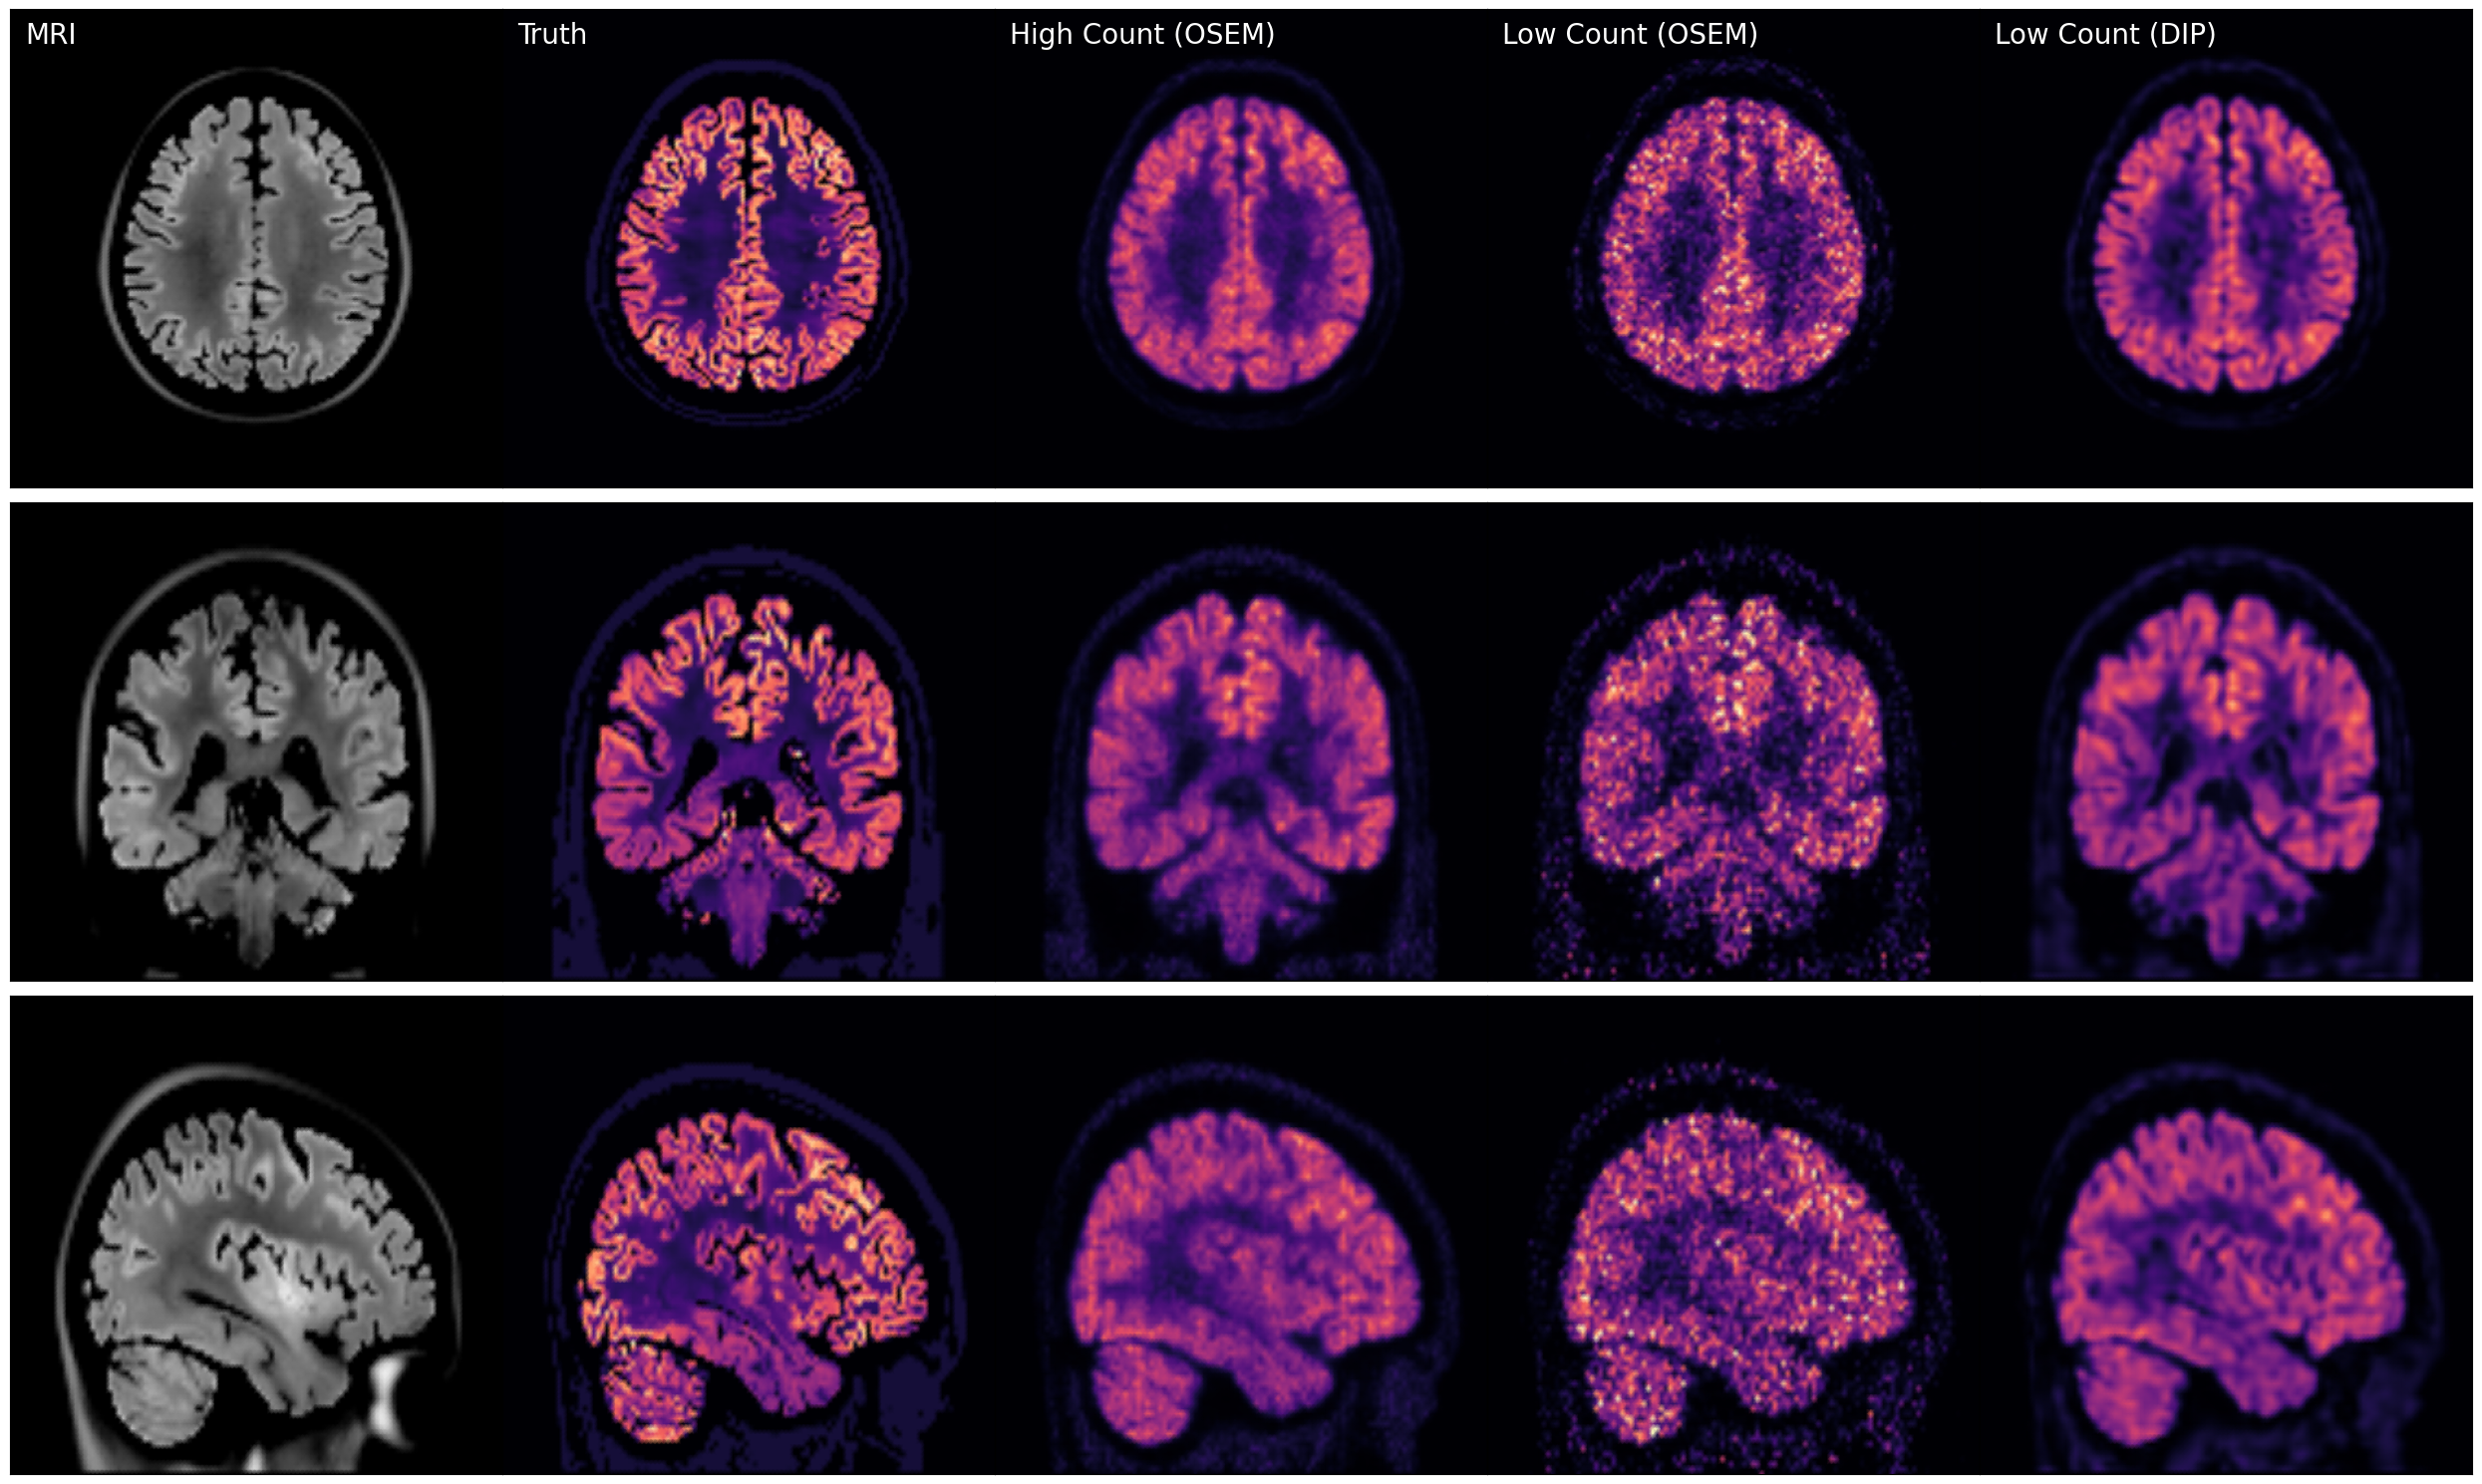

In [14]:
slc = 53
slc_cor = 45
ww = 7
gridspec = dict(wspace=0.0)
cmap = 'magma'
vmax=1.2
ims = ims_nonTOF
fig, ax = plt.subplots(3,5, figsize=(25,15), gridspec_kw=gridspec)
for i, (im, a) in enumerate(zip(ims, ax[0])):
    plt.sca(a)
    if i==0:
        plt.pcolormesh(im[:,:,slc].T, cmap='Greys_r', vmin=120, vmax=250, shading='gouraud')
        plt.text(0.03,0.93,labels[i], fontsize=20, color='white', transform = a.transAxes)
    else:
        plt.pcolormesh(im[:,:,slc].T, cmap=cmap, shading='gouraud', vmax=1.3)
        plt.text(0.03,0.93,labels[i], fontsize=20, color='white', transform = a.transAxes)
    a.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
for i, (im, a) in enumerate(zip(ims, ax[1])):
    plt.sca(a)
    if i==0:
        plt.pcolormesh(im[ww:-ww,slc].T, cmap='Greys_r', vmin=120, vmax=250, shading='gouraud')
    else:
        plt.pcolormesh(im[ww:-ww,slc].T, cmap=cmap, shading='gouraud', vmax=1.3)
    a.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
for i, (im, a) in enumerate(zip(ims, ax[2])):
    plt.sca(a)
    if i==0:
        plt.pcolormesh(im[slc_cor,ww:-ww].T, cmap='Greys_r', vmin=120, vmax=250, shading='gouraud')
    else:
        plt.pcolormesh(im[slc_cor,ww:-ww].T, cmap=cmap, shading='gouraud', vmax=1.3)
    a.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
fig.tight_layout()
plt.savefig('images/dip_recon.jpg', dpi=300, bbox_inches='tight')